In [1]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd

In [2]:
output_dir = "figures"

In [3]:
dic = {}
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/1024_true_coupling.h5ad"] = 512+1024
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/2048_true_coupling.h5ad"] = 1024+2048
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/4096_true_coupling.h5ad"] = 2048+4096
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/8192_true_coupling.h5ad"] = 4096+8192
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/16384_true_coupling.h5ad"] = 8192+16384

# CPU

In [18]:
results = seml.get_results('cpu_memory_benchmark', to_data_frame=True)

  0%|          | 0/494 [00:00<?, ?it/s]

  0%|          | 0/494 [00:00<?, ?it/s]

In [5]:
results

,_id,config.overwrite,config.db_collection,config.benchmark_mode,config.dirs,config.epsilon,config.key,config.lambda_1,config.lambda_2,config.local_pca,...,config.run,config.seed,config.threshold,config.validate_ot,result.benchmark_result,result.error,result.entropy,config.gamma,config.online,config.rank
0,1,1,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,"[245.93359375, 246.28125, 246.28125, 246.28125...",0.618372,12.805455,NaN,NaN,NaN
1,2,2,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,"[250.34375, 250.58203125, 250.58203125, 250.58...",0.201181,14.174412,NaN,NaN,NaN
2,3,3,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,"[338.4296875, 338.58984375, 338.58984375, 338....",0.607743,15.556005,NaN,NaN,NaN
3,4,4,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,"[563.3515625, 564.34765625, 564.34765625, 564....",0.663727,16.994251,NaN,NaN,NaN
4,5,5,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,0,1234,0.000001,True,"[1340.1484375, 1340.25, 1340.25, 1340.25, 1340...",0.44126,18.434837,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1079,1079,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,4,1234,0.000001,True,"[245.5, 245.62890625, 246.37890625, 258.113281...",[0.5652861159400626],[11.605324647680503],10.00,False,5.0
465,1080,1080,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,4,1234,0.000001,True,"[227.6328125, 228.3046875, 231.66015625, 238.8...",[0.5646152186202955],[11.669672958452935],100.00,False,5.0
466,1081,1081,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,4,1234,0.000001,True,"[243.6484375, 243.77734375, 248.52734375, 256....",[0.5322977266982651],[11.08817065113173],0.01,False,10.0
467,1082,1082,cpu_memory_benchmark,cpu_memory,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,4,1234,0.000001,True,"[225.63671875, 226.30078125, 226.68359375, 228...",[0.5372362963402859],[10.985802031181546],0.10,False,10.0


In [6]:
results["true_couplings_dir"] = results.apply(lambda x: x["config.dirs"][1], axis=1) 
results["n_cells"] = results["true_couplings_dir"].map(dic)

In [7]:
def adapt_model(x):
    if x["config.model"] == "WOT":
        return "WOT"
    rank = x["config.rank"]
    gamma = x["config.gamma"]
    if x["config.online"]:
        if np.isnan(rank):
            return "moscot_online"
        return f"moscot_online_{rank}_{gamma}"
    if np.isnan(rank):
        return "moscot"
    return f"moscot_{rank}_{gamma}"
    
results["model_adapted"] = results.apply(lambda x: adapt_model(x), axis=1)

In [8]:
results["max_mem"] = results.apply(lambda x: max(x["result.benchmark_result"]), axis=1)

In [9]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [10]:
"""labels_dict = {}
['Moscot', 'Moscot_online', 'Moscot_r200', 'Moscot_r50', 'WOT']
labels_dict["Moscot"] = "Moscot"
labels_dict["Moscot_online"] = "Moscot Online"
labels_dict["Moscot_r200"] = "Moscot, R=200"
labels_dict["Moscot_r50"] = "Moscot, R=50"
labels_dict["WOT"] = "WOT"""

'labels_dict = {}\n[\'Moscot\', \'Moscot_online\', \'Moscot_r200\', \'Moscot_r50\', \'WOT\']\nlabels_dict["Moscot"] = "Moscot"\nlabels_dict["Moscot_online"] = "Moscot Online"\nlabels_dict["Moscot_r200"] = "Moscot, R=200"\nlabels_dict["Moscot_r50"] = "Moscot, R=50"\nlabels_dict["WOT"] = "WOT'

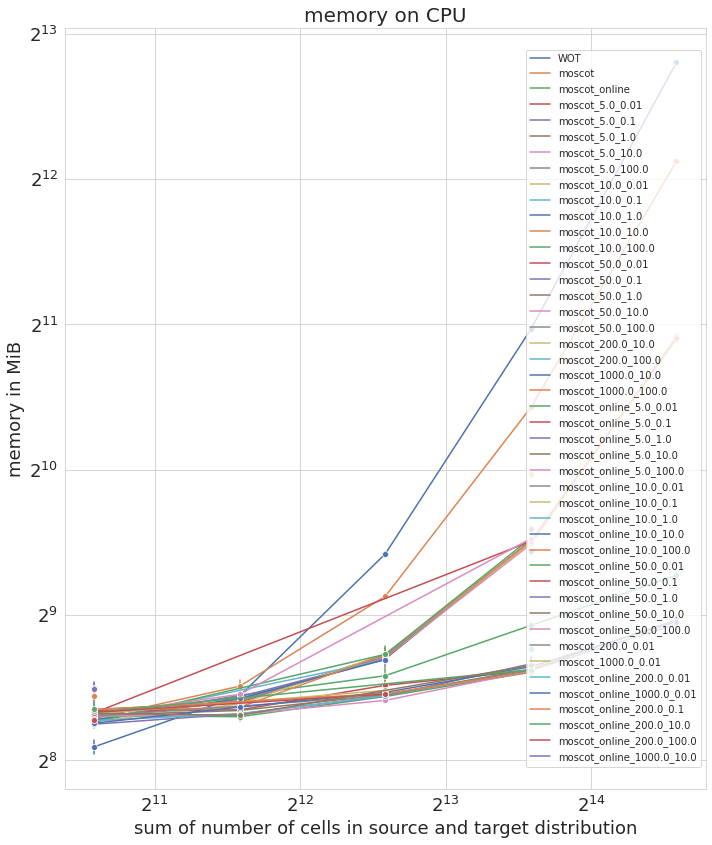

In [11]:
rows = 1
cols = 1
size = 5


#fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)*2))

pl = sns.lineplot(x='n_cells', y='max_mem', hue="model_adapted", err_style="bars", marker='o',
                     data=results, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc='upper left', 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.legend(loc='right')
axs.set_ylabel('memory in MiB', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("memory on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()
#if save_figure:
#    plt.savefig(FIG_DIR + f'/fig_2_b.jpg', dpi=300)
plt.show()

In [12]:
results_filtered = results[~ results['model_adapted'].str.startswith("moscot_online")]

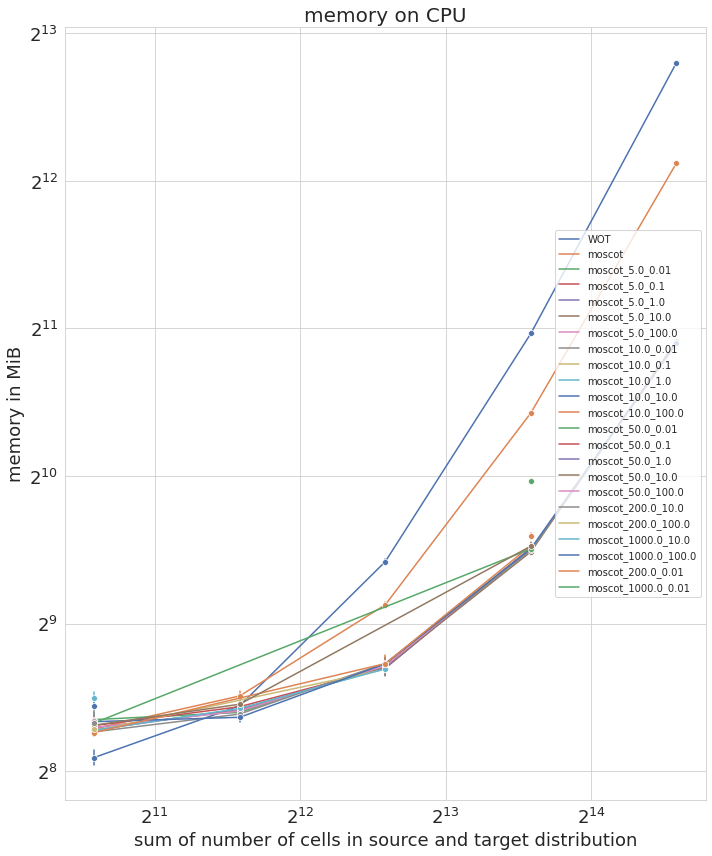

In [13]:
rows = 1
cols = 1
size = 5


#fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)*2))

pl = sns.lineplot(x='n_cells', y='max_mem', hue="model_adapted", err_style="bars", marker='o',
                     data=results_filtered, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc='upper left', 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.legend(loc='right')
axs.set_ylabel('memory in MiB', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("memory on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()
#if save_figure:
#    plt.savefig(FIG_DIR + f'/fig_2_b.jpg', dpi=300)
plt.show()

In [14]:
results_filtered_2 = results[results['model_adapted'].str.endswith("50.0_0.1")]

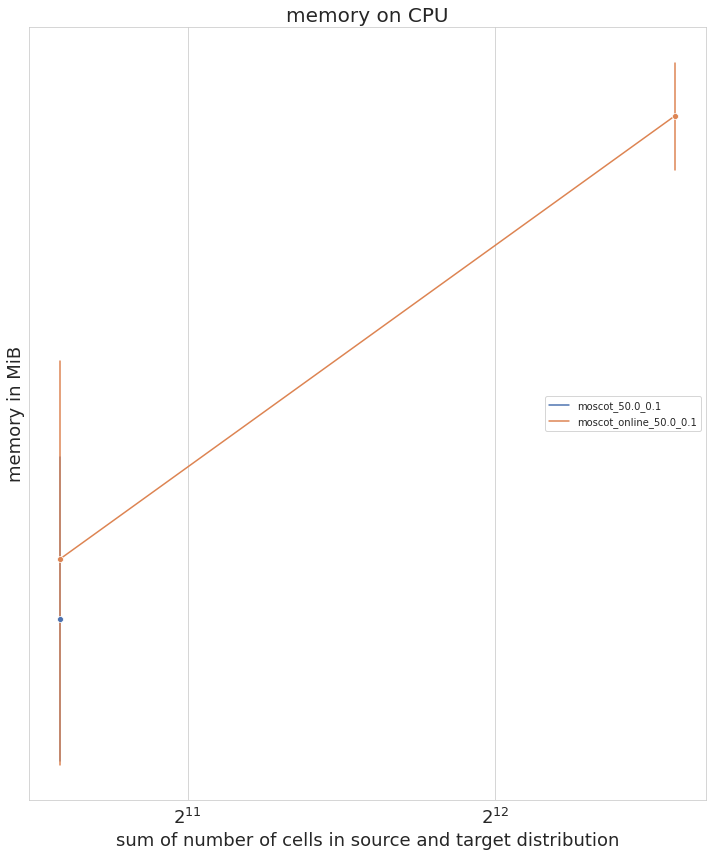

In [15]:
rows = 1
cols = 1
size = 5


#fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)*2))

pl = sns.lineplot(x='n_cells', y='max_mem', hue="model_adapted", err_style="bars", marker='o',
                     data=results_filtered_2, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc='upper left', 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.legend(loc='right')
axs.set_ylabel('memory in MiB', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("memory on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()
#if save_figure:
#    plt.savefig(FIG_DIR + f'/fig_2_b.jpg', dpi=300)
plt.show()

In [16]:
def adapt_error(x):
    if isinstance(x['result.error'], np.ndarray):
        return x['result.error'][0]
    return x['result.error']

results["error_adapted"] = results.apply(lambda x: adapt_error(x), axis=1)

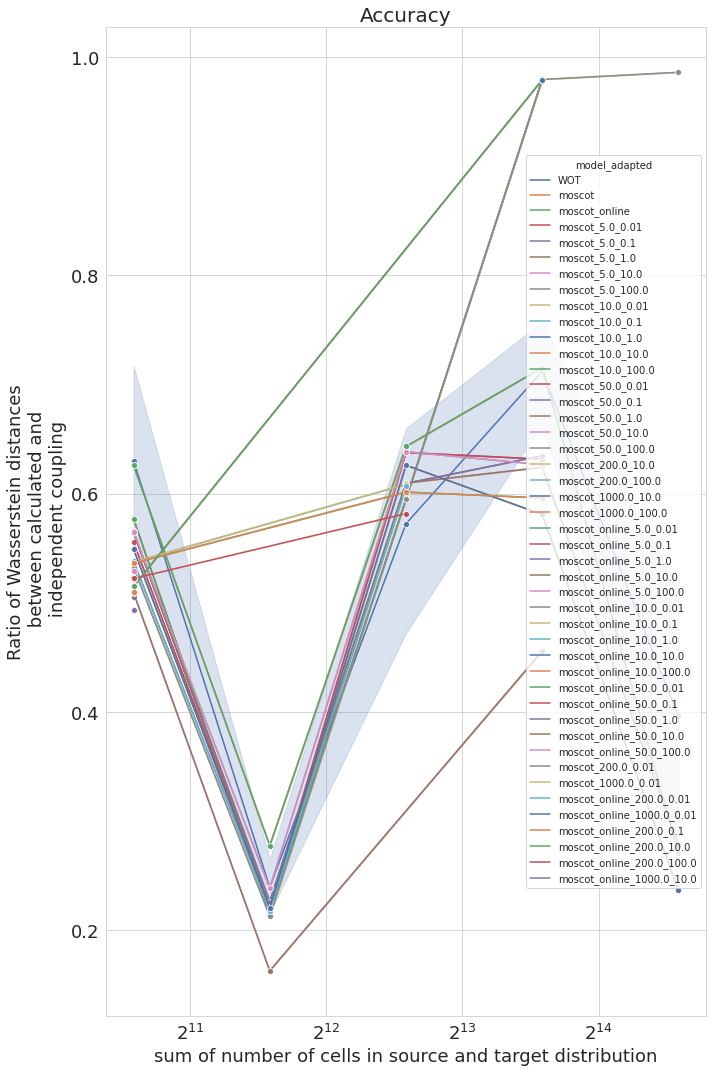

In [17]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)*2.5))
pl = sns.lineplot(x='n_cells', y='error_adapted', hue="model_adapted", marker='o', 
                     data=results, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Ratio of Wasserstein distances\n between calculated and\n independent coupling', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Accuracy", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()